In [1]:
import sys
sys.path.insert(0, "/Users/chutianwang/OneDrive/College 2025/Phys_20CL")
from utils import *

In [2]:
#import codecs
data = CSVexplorer("data.csv", ignoreRow = 1)
print(data.getHeader())
for key, column in data.buffer.items():
    data.convertType(range(6), float)
    data.convertContainer(key, np.array)

{0: '\ufeff$V_a\\pm0.1$', 1: '$I\\pm0.0005$', 2: '$V_a\\pm0.1$ (1)', 3: '$I\\pm0.0003$ (1)', 4: '$V_a\\pm0.1$ (2)', 5: '$I\\pm0.0003$ (2)'}


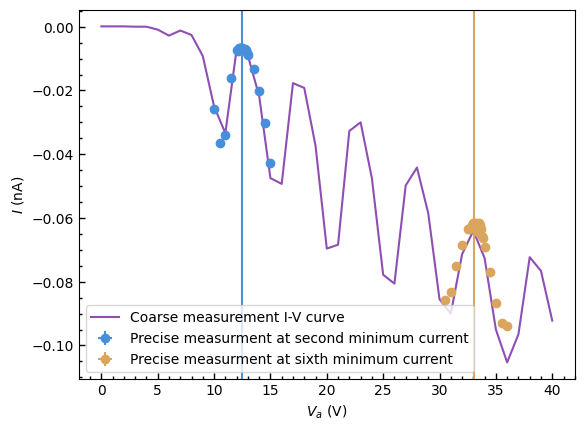

In [3]:
fig, ax = plt.subplots()
setAx(ax)

ax.set_xlabel(fr"$V_a$ (V)")
ax.set_ylabel(fr"$I$ (nA)")

ax.plot(data[0], data[1], color = colors[0],
       label = "Coarse measurement I-V curve")
ax.errorbar(data[2], data[3], yerr = 0.0003, xerr = 0.1, fmt = 'o', color = colors[1],
            label = "Precise measurment at second minimum current")
ax.errorbar(data[4], data[5], yerr = 0.0003, xerr = 0.1, fmt = 'o', color = colors[3],
           label = "Precise measurment at sixth minimum current")

ax.axvline(data[2][data[3].argmax()], color = colors[1])
ax.axvline(data[4][data[5].argmax()], color = colors[3])

ax.legend()

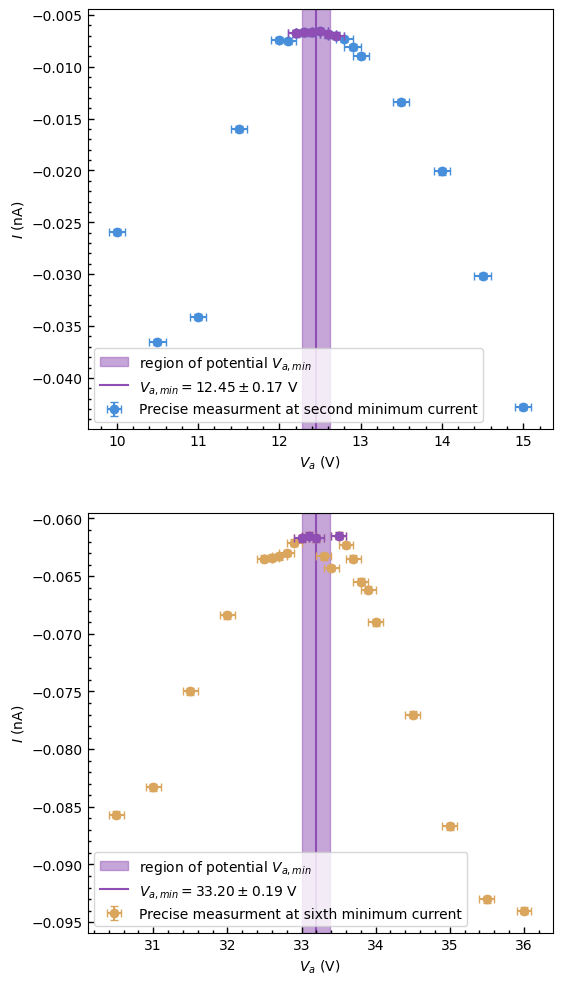

In [25]:
fig, axs = plt.subplots(2,1, figsize = (6,12))
setAx(axs)

axs[0].set_xlabel(fr"$V_a$ (V)")
axs[0].set_ylabel(fr"$I$ (nA)")
axs[1].set_xlabel(fr"$V_a$ (V)")
axs[1].set_ylabel(fr"$I$ (nA)")

axs[0].errorbar(data[2], data[3], yerr = 0.0003, xerr = 0.1, fmt = 'o', capsize = 3, color = colors[1],
            label = "Precise measurment at second minimum current", zorder = 1)

axs[1].errorbar(data[4], data[5], yerr = 0.0003, xerr = 0.1, fmt = 'o', capsize = 3, color = colors[3],
            label = "Precise measurment at sixth minimum current", zorder = 1)

minIdx0 = np.argwhere(np.abs(data[3] - data[3][data[3].argmax()]) <= 0.0006).flatten()
V_a0 = data[2][minIdx0].mean()
dV_a0 = RMSD(data[2][minIdx0])
axs[0].errorbar(data[2][minIdx0], data[3][minIdx0],
                xerr = 0.1, yerr = 0.0003, fmt = 'o', capsize = 3,
                color = colors[0], zorder = 2)
axs[0].axvspan(V_a0 - dV_a0, V_a0 + dV_a0, 
               color = colors[0], alpha = 0.5, zorder = 0,
               label = "region of potential $V_{a,min}$")
axs[0].axvline(V_a0, color = colors[0], zorder = 0,
              label = fr"$V_{{a,min}}={V_a0:.2f}\pm{dV_a0:.2f}$ V")

minIdx1 = np.argwhere(np.abs(data[5] - data[5][data[5].argmax()]) <= 0.0006).flatten()
V_a1 = data[4][minIdx1].mean()
dV_a1 = RMSD(data[4][minIdx1])
axs[1].errorbar(data[4][minIdx1], data[5][minIdx1],
                xerr = 0.1, yerr = 0.0003, fmt = 'o', capsize = 3,
                color = colors[0], zorder = 2)
axs[1].axvspan(V_a1 - dV_a1, V_a1 + dV_a1,
               color = colors[0], alpha = 0.5, zorder = 0, 
               label = "region of potential $V_{a,min}$")
axs[1].axvline(V_a1, color = colors[0], zorder = 0,
               label = fr"$V_{{a,min}}={V_a1:.2f}\pm{dV_a1:.2f}$ V")


axs[0].legend()
axs[1].legend()

In [8]:
E = (33.20 - 12.45) / 4
dE = (0.17 + 0.19) / 4
print(f"E = {E:.2f} ± {dE:.2f} eV")

E = 5.19 ± 0.09 eV


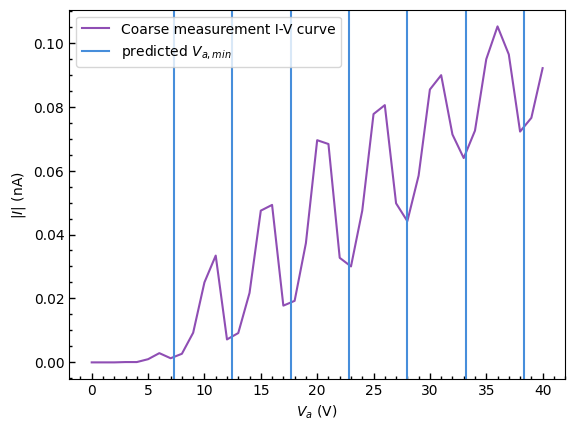

In [21]:
fig, bx = plt.subplots()
setAx(bx)

bx.set_xlabel(fr"$V_a$ (V)")
bx.set_ylabel(fr"$|I|$ (nA)")

bx.plot(data[0], -data[1], color = colors[0],
       label = "Coarse measurement I-V curve")
for i in range(-1, 6):
    if i == 0:
        bx.axvline(V_a1 - i * E, color = colors[1],
                  label = r"predicted $V_{a,min}$")
    else:
        bx.axvline(V_a1 - i * E, color = colors[1])
    
bx.legend()